In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
df_daily_count = pd.read_csv('F:/WB/Issue Monitoring/data/daily_keyword_count.csv')
df_daily_count['date'] = pd.to_datetime(df_daily_count['date'])
df_daily_count = df_daily_count[df_daily_count['date']>='2020-05-04'].reset_index(drop=True)

df_daily_count_new_normal = pd.read_csv('F:/WB/Issue Monitoring/data/daily_keyword_count_new_normal.csv')
df_daily_count_new_normal['date'] = pd.to_datetime(df_daily_count_new_normal['date'])
df_daily_count_new_normal = df_daily_count_new_normal[df_daily_count_new_normal['date']>='2020-05-04'].reset_index(drop=True)

df_comparison_temp = df_daily_count.merge(df_daily_count_new_normal,on=['topic','date'],how='inner',suffixes=('_general', '_new_normal'))[['topic','date','count_new_normal','count_general']]
df_comparison_temp['count_non_new_normal'] = df_comparison_temp['count_general'] - df_comparison_temp['count_new_normal']

In [10]:
comparison_dict = {}
i = 0
for topic in ['confidence in government','economic policy','employment','health care','health protocol','mobility']:
    df_temp = df_comparison_temp[df_comparison_temp['topic']==topic].reset_index(drop=True)
    for row in range(len(df_temp)):  
        for _type in ['new_normal','non_new_normal']:
            comparison_dict[i] = {'topic':topic,'date':df_comparison_temp.loc[row,'date'],'type':_type,'count':df_comparison_temp.loc[row,'count_{}'.format(_type)]}
            i += 1

df_comparison = pd.DataFrame.from_dict(comparison_dict,orient='index')
df_comparison = df_comparison.sort_values(by=['date','topic']).reset_index(drop=True)
df_comparison = df_comparison.groupby(['date','type']).sum()[['count']].reset_index()

In [11]:
df_comparison.head()

,date,type,count
0,2020-05-04,new_normal,4662
1,2020-05-04,non_new_normal,21420
2,2020-05-05,new_normal,3612
3,2020-05-05,non_new_normal,22536
4,2020-05-06,new_normal,8784


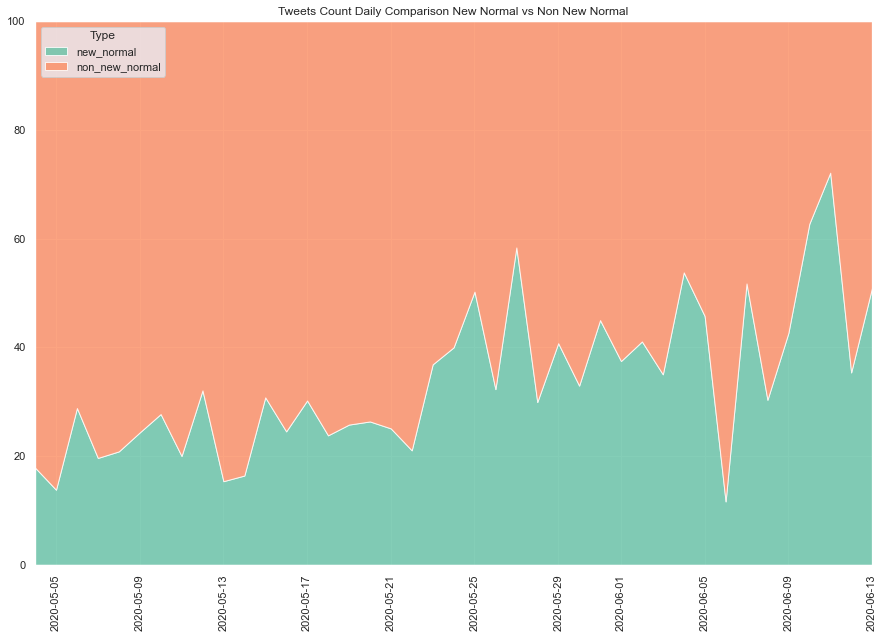

In [12]:
x = list(df_comparison.date.unique())
y = []
legend = []
i=0
for _type in ['new_normal','non_new_normal']:
    yy = []
    df_filter = df_comparison[df_comparison['type']==_type]
    for date in x:
        try:
            yy.append(df_filter[df_filter.date==date]['count'].values[0])
        except:
            yy.append(0)
    y.append(yy)
    legend.append(_type)
    i+=1

y = np.vstack(y)
y = y /  y.sum(axis=0).astype(float) * 100 

fig, ax1 = plt.subplots(figsize=(15,10))
plt.title("Tweets Count Daily Comparison New Normal vs Non New Normal")
pal = sns.color_palette("Set2")
ax1.stackplot(x, y, labels=legend,colors=pal,alpha=0.8)
ax1.tick_params(axis='x', rotation=90)
ax1.legend(legend,loc='upper left',title="Type")
ax1.set_xlim([x[0],x[-1]])
ax1.set_ylim([0,100])
plt.show()
fig.savefig('F:/WB/Issue Monitoring/chart_output/daily_comparison_new_normal.png', dpi=fig.dpi)